In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import datetime

In [2]:
df = pd.read_csv('market_svi_edgar.csv', encoding='latin1')
df_com =  pd.read_csv('../data/companies_after_2005.csv', encoding='latin1')
df.head()

,Unnamed: 0,symbol,date,svi,svi.1,edgar,price,volume
0,0,MSFT,2005-01-02,18,31338,145,26.67,398924026.0
1,1,MSFT,2005-01-09,19,33079,3220,26.12,379712121.0
2,2,MSFT,2005-01-16,12,20892,3030,25.65,266617523.0
3,3,MSFT,2005-01-23,20,34820,3539,26.18,409844550.0
4,4,MSFT,2005-01-30,15,26115,4112,26.32,347830186.0


In [3]:
df_com.head()

,Unnamed: 0,Rank,Name,Symbol,marketcap,price (USD),country,IPO_year,capitalization
0,0,1,Microsoft,MSFT,3002343620608,404.06,United States,1986,high
1,1,2,Apple,AAPL,2815212650496,182.31,United States,1980,high
2,2,4,NVIDIA,NVDA,1793541144576,726.13,United States,1999,high
3,3,5,Amazon,AMZN,1760768032768,169.51,United States,1997,high
4,4,6,Alphabet (Google),GOOG,1753911394304,141.76,United States,2004,high


In [4]:
merged_df = pd.merge(df, df_com[['Symbol', 'capitalization']], left_on='symbol', right_on='Symbol', how='left')

merged_df.drop(columns=['Symbol'], inplace=True)

merged_df['weekly_return'] = (merged_df['price'] - merged_df.groupby('symbol')['price'].shift(1)) / merged_df.groupby('symbol')['price'].shift(1)
merged_df.head()

,Unnamed: 0,symbol,date,svi,svi.1,edgar,price,volume,capitalization,weekly_return
0,0,MSFT,2005-01-02,18,31338,145,26.67,398924026.0,high,NaN
1,1,MSFT,2005-01-09,19,33079,3220,26.12,379712121.0,high,-0.020622
2,2,MSFT,2005-01-16,12,20892,3030,25.65,266617523.0,high,-0.017994
3,3,MSFT,2005-01-23,20,34820,3539,26.18,409844550.0,high,0.020663
4,4,MSFT,2005-01-30,15,26115,4112,26.32,347830186.0,high,0.005348


In [5]:
low = merged_df['capitalization'] == 'low'
low_cap = merged_df[low]['symbol'].unique()
low_cap

array(['DNN', 'VEON', 'VRTS', 'LKFN', 'CPRX', 'TRMK', 'NBTB', 'CXW',
       'POM.PA', 'BB', 'THRM', 'LZB', 'NSSC', 'SPNS', 'DVAX', 'EIF.TO',
       'TTMI', 'TDS', 'CBRL', 'TARO', 'NTCT', 'CSGS', 'EXTR', 'MRTN',
       'OXM', 'FRU.TO', 'BANR', 'HLX', 'JACK', 'AMWD', 'GPRE', 'UFPT',
       'LIF.TO', 'FBNC', 'FNLC', 'GTY', 'FWRG', 'HWKN', 'HTLF', 'IMKTA',
       'CFP.TO', 'ENGH.TO', 'CTS', 'SYBT', 'FCF', 'LNN', 'LTC', 'CAL',
       'KFRC', 'GES', 'NWN', 'PDFS', 'WG.L', 'ANZFF', 'AG', 'OMCL',
       'LGND', 'BUSE', 'SMTC', 'DBD', 'SPH', 'CMCO', 'WABC', 'MDA.TO',
       'RPT', 'TGI', 'AIV', 'INE.TO', 'MFA', 'NX', 'CGAU', 'PRAA', 'GERN',
       'PERI', 'BHE', 'MGNX', 'GIII'], dtype=object)

In [6]:
high = merged_df['capitalization'] == 'high'
high_cap = merged_df[high]['symbol'].unique()
high_cap

array(['MSFT', 'AAPL', 'NVDA', 'AMZN', 'GOOG', 'BRK-B', 'LLY', 'TSM',
       'NVO', 'JPM', 'UNH', 'WMT', 'XOM', 'JNJ', 'PG', 'ASML', 'HD',
       'TCEHY', 'MRK', 'COST', 'TM', 'ORCL', 'CVX', 'AMD', 'CRM', 'BAC',
       'KO', 'NFLX', 'TMO', 'MCD', 'SAP', 'DIS', '601857.SS', 'AZN',
       'ABT', 'CSCO', 'TMUS', 'WFC', 'DHR', 'INTC', 'INTU', 'IBM', 'QCOM',
       'VZ', 'AMAT', 'CMCSA', 'CAT', 'NKE', 'PFE', 'AXP', 'AMGN', 'UNP',
       'TXN', 'SIE.DE', 'MS', 'RY', 'HDB', 'ISRG', 'SPGI', 'SYK', 'IDEXY',
       'LOW', 'COP', 'HON', 'BKNG', 'UL', 'UPS', 'PLD', 'AIR.PA', 'GS',
       'BA', 'BUD', 'LRCX', 'T', 'RTX', 'DTE.DE', 'BLK', 'SCHW', 'NEE',
       'SNY', 'PBR', 'MDT', 'RIO', 'TJX', 'PGR', 'SONY', 'VRTX', 'TD',
       'SBUX', 'C', 'ALV.DE', 'REGN', 'ADP', 'LMT', 'DE', 'BMY', 'BP',
       'CI', 'MMC', 'CVS', 'MDLZ', 'BSX', 'EL.PA', 'CSL.AX', 'KLAC',
       'GILD', 'FI', 'MU', 'AMT', 'IBN', '9983.T', 'GSK', 'INFY', 'SNPS',
       '8058.T', 'CNI', '0883.HK', 'HCA', 'DEO', '9984.T', 'WM', 'R

In [7]:
def plot_compare(company, year, start, end, window=3, ax=None):
    df_company = merged_df[(merged_df['symbol'] == company) & (merged_df['date'].str.contains(year)) & (merged_df['date'] >= start) & (merged_df['date'] <= end)]
    
    data_to_plot = df_company[['svi', 'edgar', 'weekly_return']]

    # Calculate moving averages
    svi_ma = data_to_plot['svi'].rolling(window=window).mean()
    edgar_ma = data_to_plot['edgar'].rolling(window=window).mean()
    return_ma = data_to_plot['weekly_return'].rolling(window=window).mean()

    # Standardize the moving averages using Z score
    scaler = StandardScaler()
    svi_ma_normalized = scaler.fit_transform(svi_ma.values.reshape(-1, 1)).flatten()
    edgar_ma_normalized = scaler.fit_transform(edgar_ma.values.reshape(-1, 1)).flatten()
    return_ma_normalized = scaler.fit_transform(return_ma.values.reshape(-1, 1)).flatten()
    
    # Convert dates to week numbers
    week_numbers = df_company['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%U'))

    # Plot the lines on the provided axes or a new figure if axes are not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6), dpi=480)
    ax.plot(week_numbers, svi_ma_normalized, label=f'SVI Moving Average ({window} weeks)')
    ax.plot(week_numbers, edgar_ma_normalized, label=f'EDGAR Moving Average ({window} weeks)')
    ax.plot(week_numbers, return_ma_normalized, label=f'Weekly Return Moving Average ({window} weeks)')
    ax.set_xlabel('Week')
    ax.set_ylabel('Normalized Value')
    ax.set_title(f'{company} during {start} and {end}')
    ax.legend()

def plot_comparison_grid(company_list, year, start_date, end_date, window=3):
    num_companies = len(company_list)
    num_rows = (num_companies + 1) // 2  # Ensure at least two rows
    num_cols = min(num_companies, 2)     # Maximum two columns
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

    for i, company in enumerate(company_list):
        row = i // num_cols
        col = i % num_cols
        plot_compare(company, year, start_date, end_date, window, ax=axes[row, col])

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.show()

In [8]:
def compare_svi(company, year, start, end, window=3, ax=None):
    df_company = merged_df[(merged_df['symbol'] == company) & (merged_df['date'].str.contains(year)) & (merged_df['date'] >= start) & (merged_df['date'] <= end)]
    
    data_to_plot = df_company[['svi', 'weekly_return']]

    # Calculate moving averages
    svi_ma = data_to_plot['svi'].rolling(window=window).mean()
    return_ma = data_to_plot['weekly_return'].rolling(window=window).mean()

    # Standardize the moving averages using Z score
    scaler = StandardScaler()
    svi_ma_normalized = scaler.fit_transform(svi_ma.values.reshape(-1, 1)).flatten()
    return_ma_normalized = scaler.fit_transform(return_ma.values.reshape(-1, 1)).flatten()
    
    # Convert dates to week numbers
    week_numbers = df_company['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%U'))

    # Plot the lines on the provided axes or a new figure if axes are not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6), dpi=480)
    ax.plot(week_numbers, svi_ma_normalized, label=f'SVI Moving Average ({window} weeks)', color='blue')
    ax.plot(week_numbers, return_ma_normalized, label=f'Weekly Return Moving Average ({window} weeks)', color='green')
    ax.set_xlabel('Week')
    ax.set_ylabel('Normalized Value')
    ax.set_title(f'{company} during {start} and {end}')
    ax.legend()

def compare_svi_grid(company_list, year, start_date, end_date, window=3):
    num_companies = len(company_list)
    num_rows = (num_companies + 1) // 2  # Ensure at least two rows
    num_cols = min(num_companies, 2)     # Maximum two columns
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

    for i, company in enumerate(company_list):
        row = i // num_cols
        col = i % num_cols
        compare_svi(company, year, start_date, end_date, window, ax=axes[row, col])

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.show()

In [9]:
def compare_edgar(company, year, start, end, window=3, ax=None):
    df_company = merged_df[(merged_df['symbol'] == company) & (merged_df['date'].str.contains(year)) & (merged_df['date'] >= start) & (merged_df['date'] <= end)]
    
    data_to_plot = df_company[['edgar', 'weekly_return']]

    # Calculate moving averages
    edgar_ma = data_to_plot['edgar'].rolling(window=window).mean()
    return_ma = data_to_plot['weekly_return'].rolling(window=window).mean()

    # Standardize the moving averages using Z score
    scaler = StandardScaler()
    edgar_ma_normalized = scaler.fit_transform(edgar_ma.values.reshape(-1, 1)).flatten()
    return_ma_normalized = scaler.fit_transform(return_ma.values.reshape(-1, 1)).flatten()
    
    # Convert dates to week numbers
    week_numbers = df_company['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%U'))

    # Plot the lines on the provided axes or a new figure if axes are not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6), dpi=480)
    ax.plot(week_numbers, edgar_ma_normalized, label=f'EDGAR Moving Average ({window} weeks)', color='orange')
    ax.plot(week_numbers, return_ma_normalized, label=f'Weekly Return Moving Average ({window} weeks)', color='green')
    ax.set_xlabel('Week')
    ax.set_ylabel('Normalized Value')
    ax.set_title(f'{company} during {start} and {end}')
    ax.legend()

def compare_edgar_grid(company_list, year, start_date, end_date, window=3):
    num_companies = len(company_list)
    num_rows = (num_companies + 1) // 2  # Ensure at least two rows
    num_cols = min(num_companies, 2)     # Maximum two columns
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

    for i, company in enumerate(company_list):
        row = i // num_cols
        col = i % num_cols
        compare_edgar(company, year, start_date, end_date, window, ax=axes[row, col])

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.show()

High Capital companies comparision

1. IT

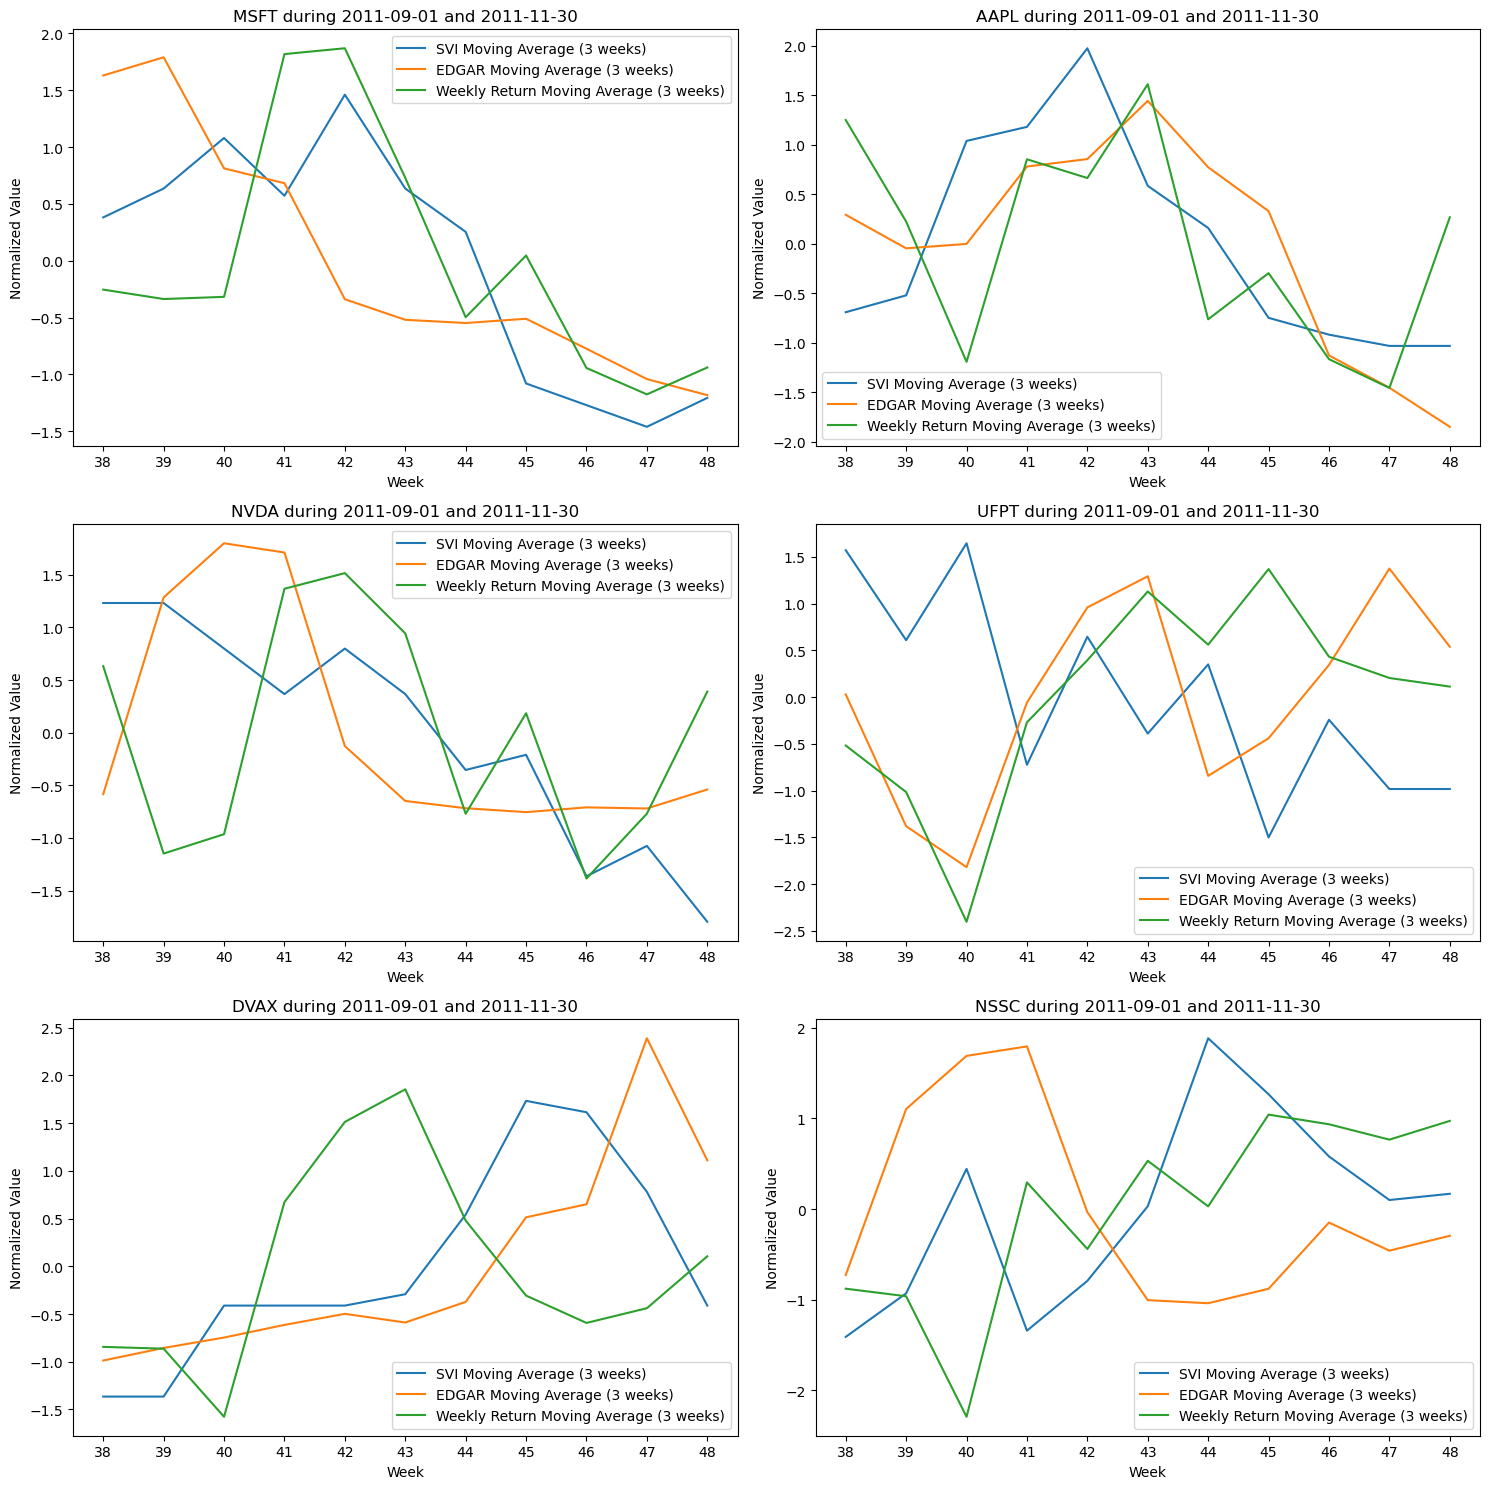

In [11]:
#Compare three IT high and three low capital companies
it_com = ['MSFT', 'AAPL', 'NVDA', 'UFPT', 'DVAX', 'NSSC']
plot_comparison_grid(it_com, '2011', '2011-09-01', '2011-11-30')

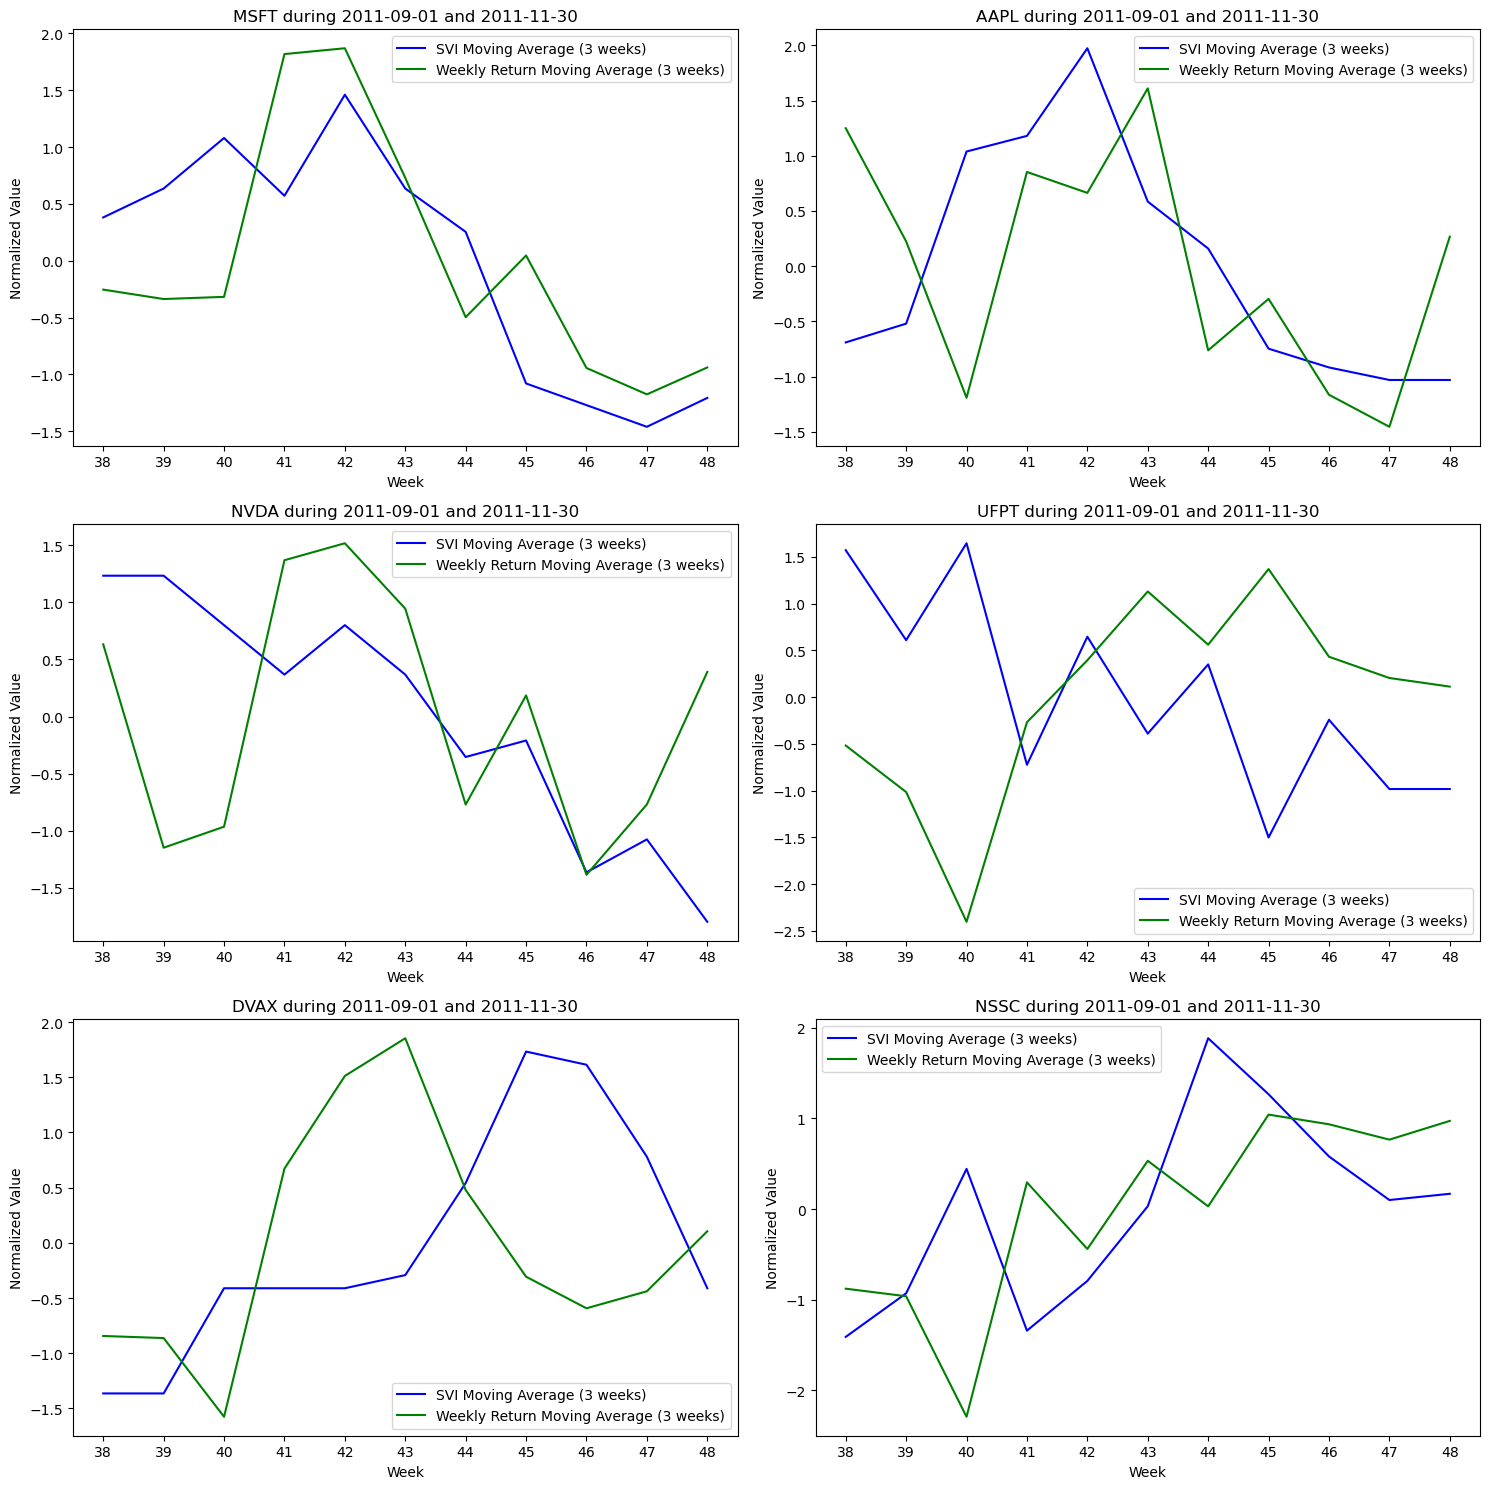

In [12]:
compare_svi_grid(it_com, '2011', '2011-09-01', '2011-11-30')

For some high capital companies such as MSFT and APPL, it seems to be a certain positive correlation and lag between SVI and return.

For low capital companies, it's not evident that there is a strong correlation between SVI and weekly return.

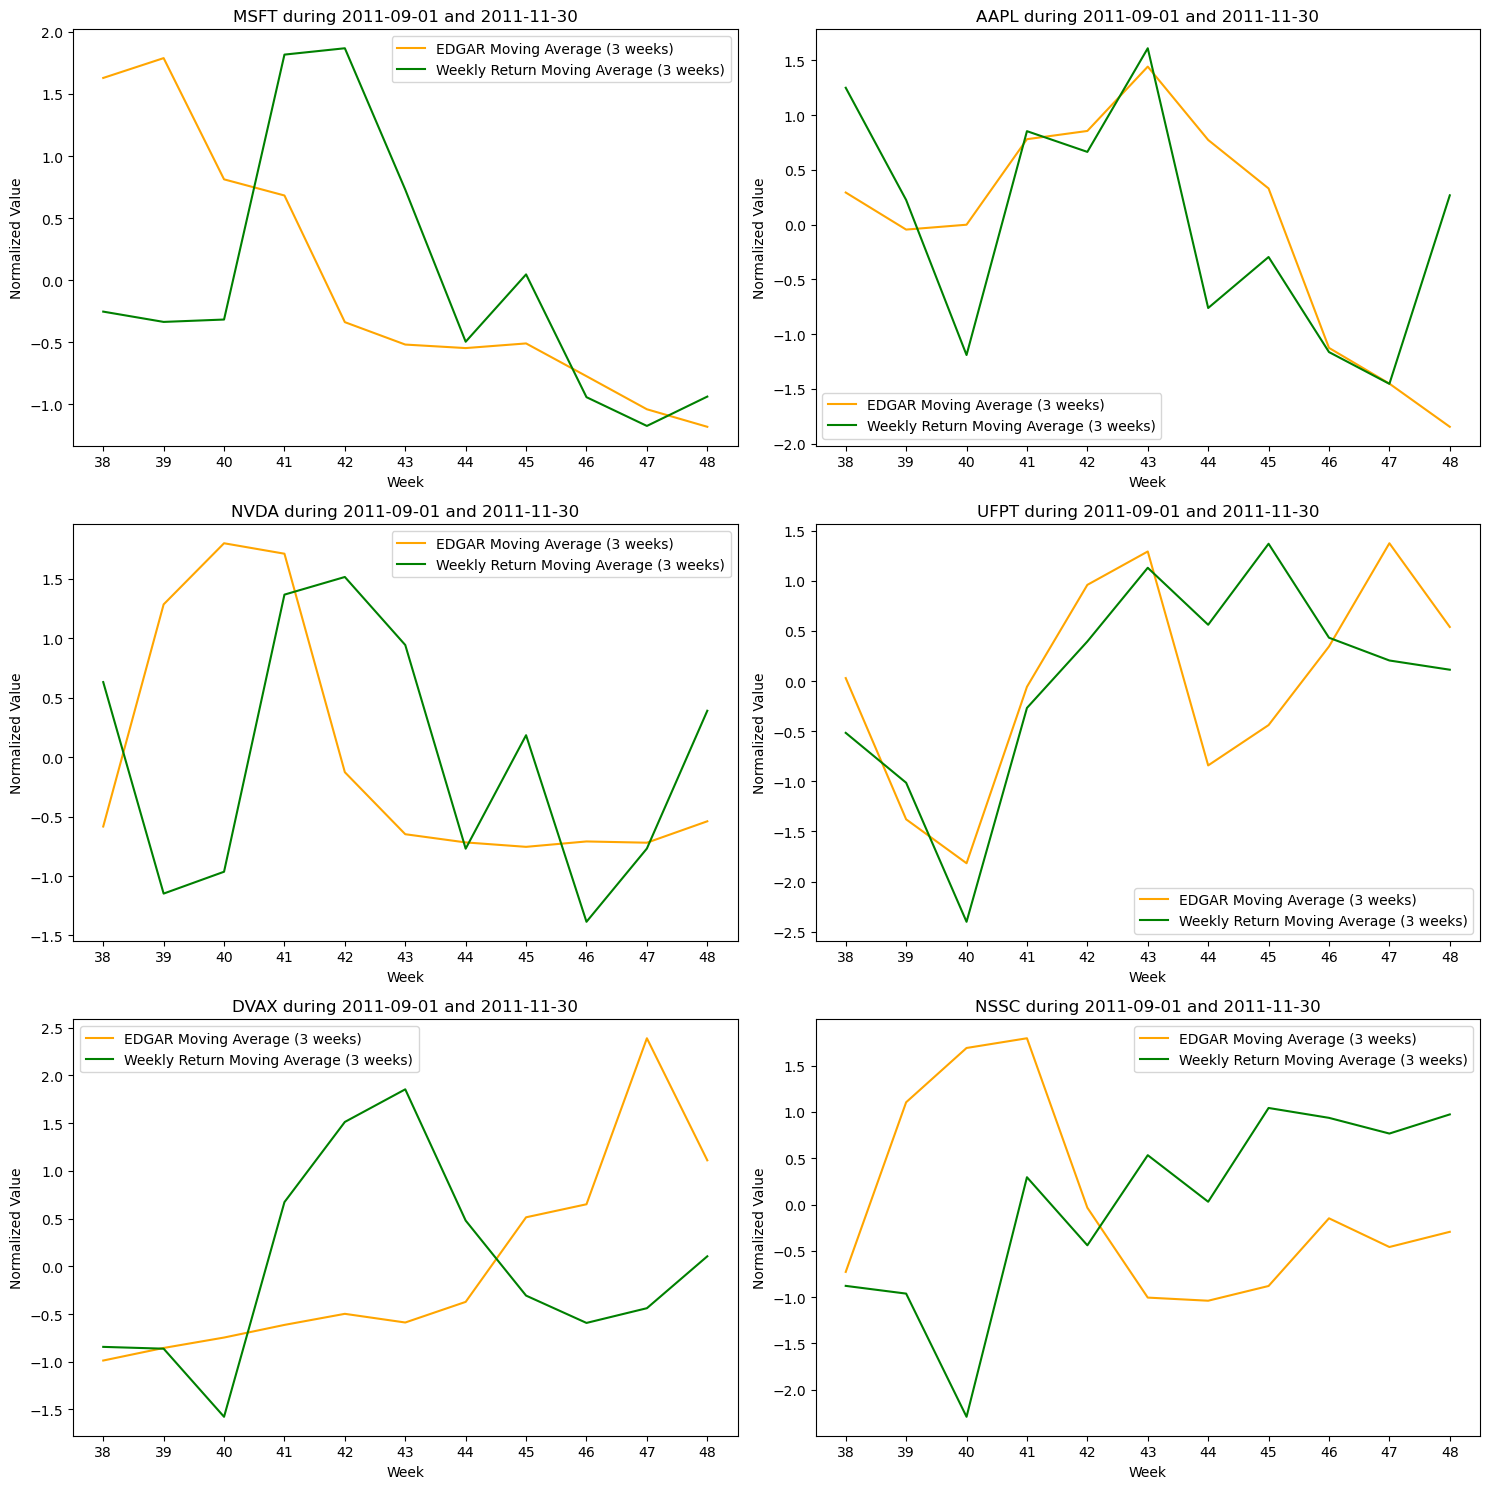

In [13]:
compare_edgar_grid(it_com, '2011', '2011-09-01', '2011-11-30')

2. Finance

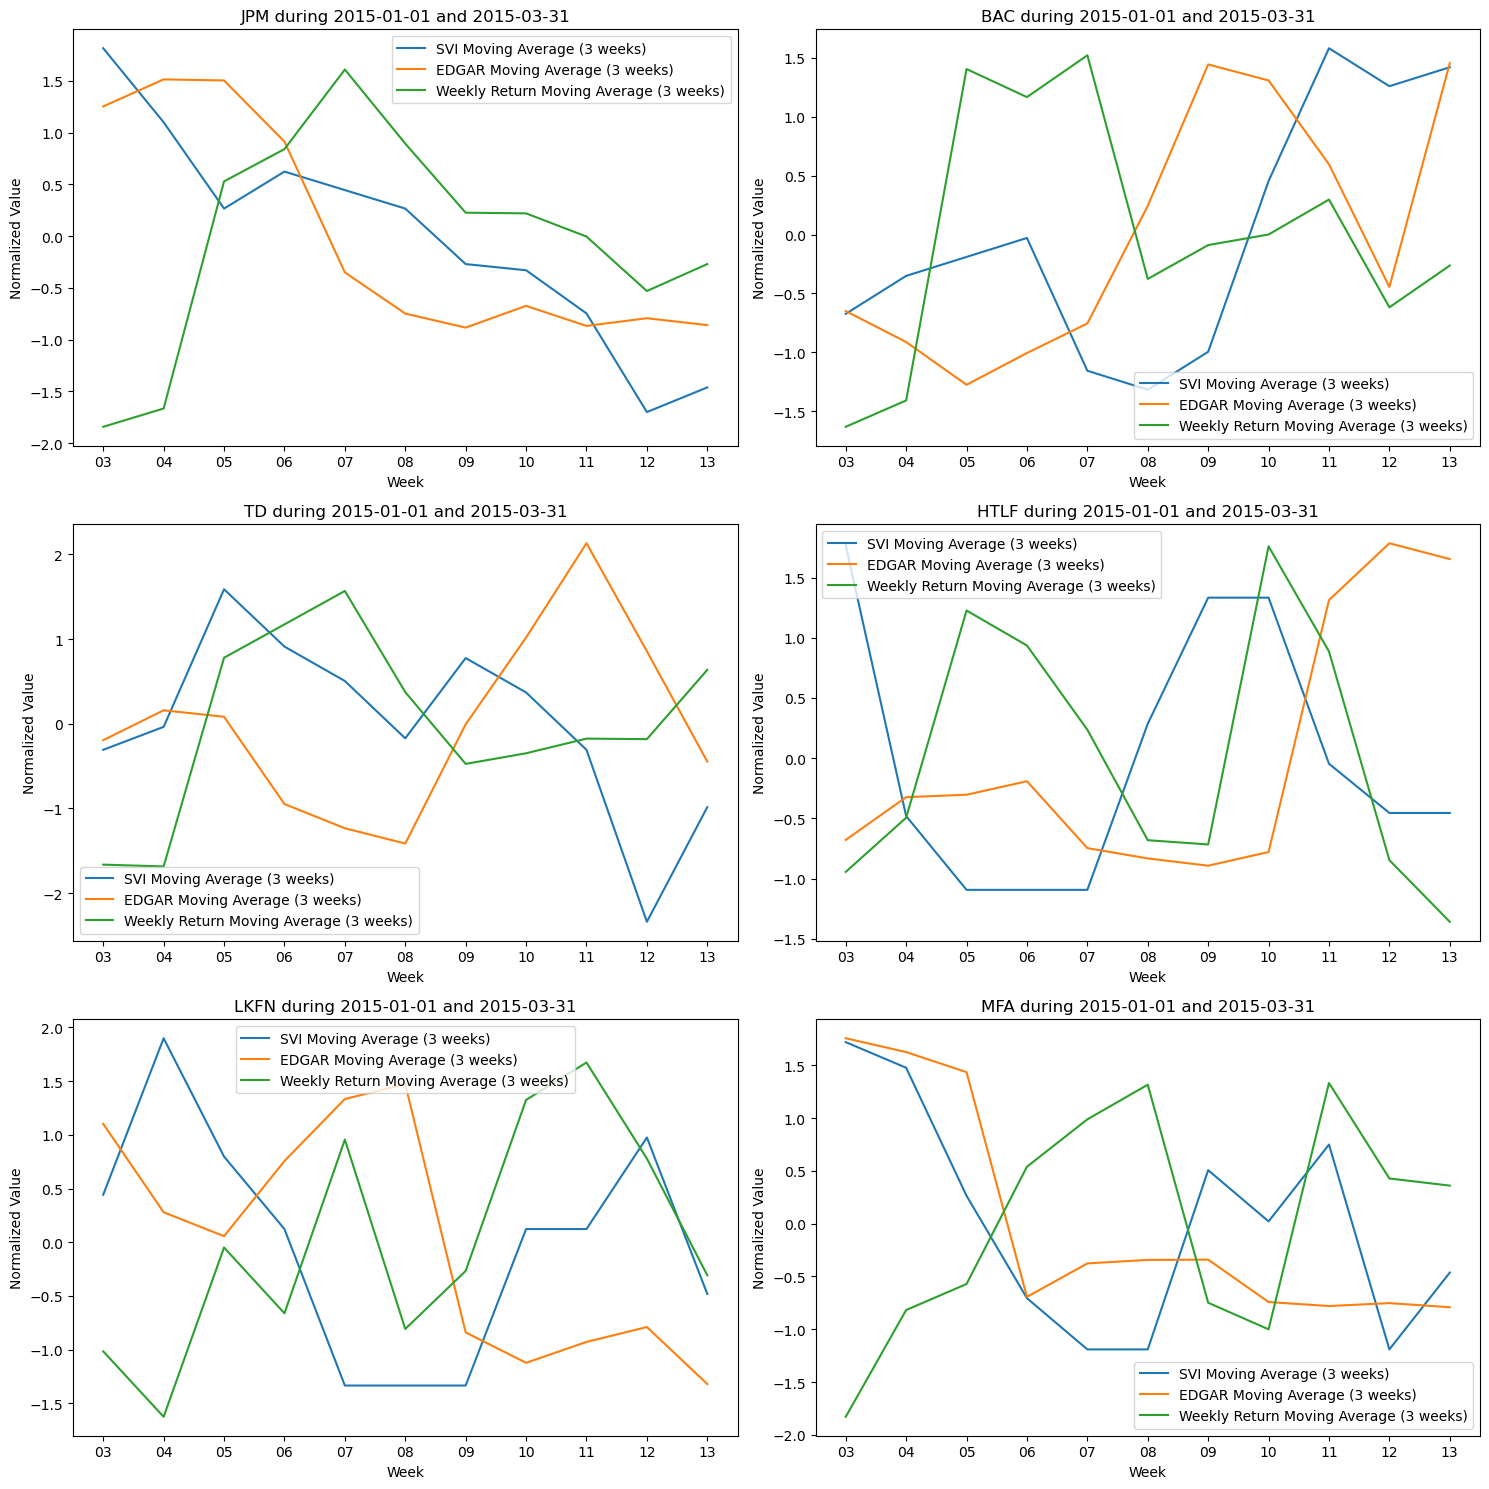

In [14]:
fin_com = ['JPM', 'BAC', 'TD', 'HTLF', 'LKFN', 'MFA']
plot_comparison_grid(fin_com, '2015', '2015-01-01', '2015-03-31')

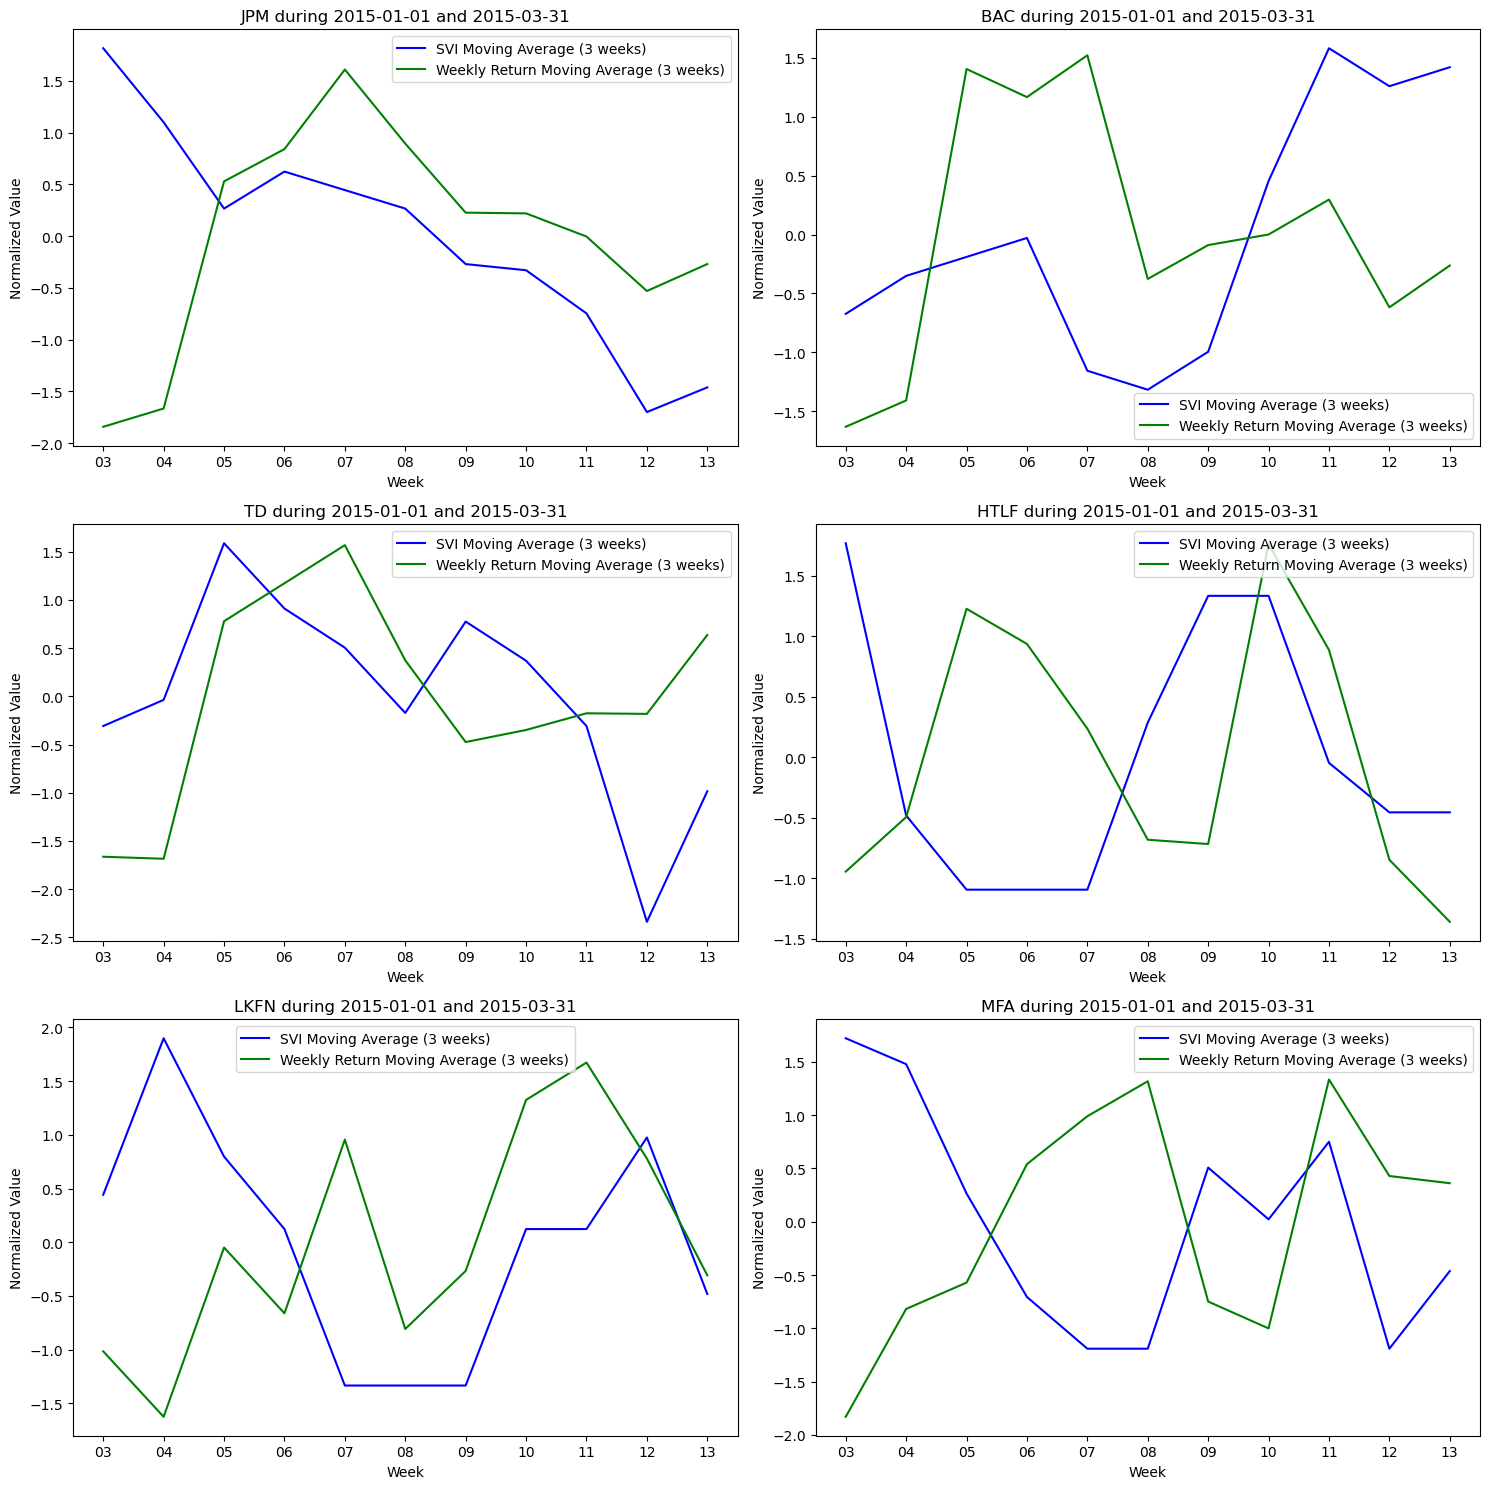

In [15]:
compare_svi_grid(fin_com, '2015', '2015-01-01', '2015-03-31')

For financial companies, the correlation between SVI and weekly return is not readily observable. However, for both large and small companies, significant deviations in SVI, exceeding two units (anomalous changes), may potentially lead to anomalous changes in weekly return. For instance, in the case of JPM, SVI declined from 0.5 to -2 from week 6 to week 12, coinciding with a sharp decline in weekly return starting from week 7. Similarly, for HTLF, the abnormal increase in SVI during week 7 corresponds to an abnormal increase in return during week 9.

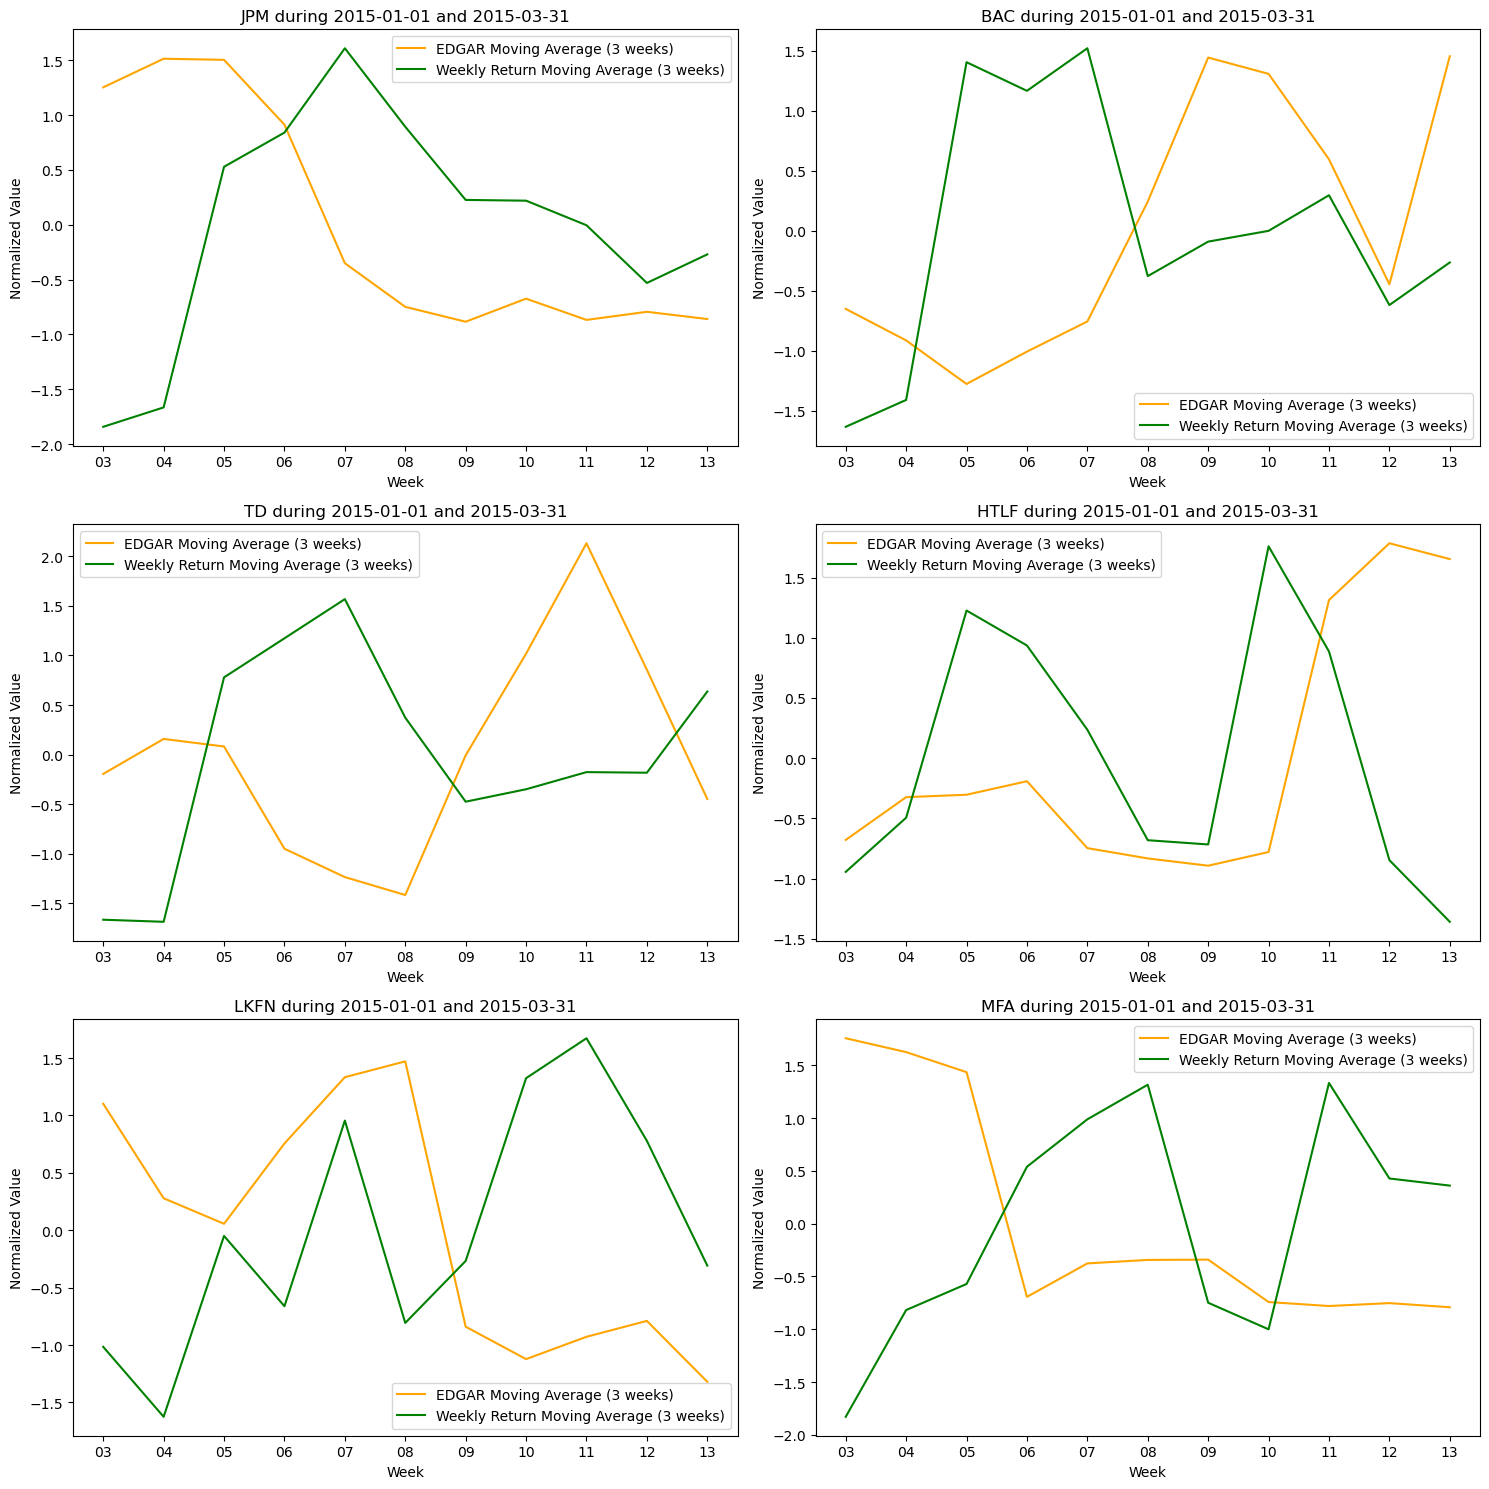

In [16]:
compare_edgar_grid(fin_com, '2015', '2015-01-01', '2015-03-31')

It's not evident that there is a strong correlation between EDGAR and weekly return.

3. Consumer goods

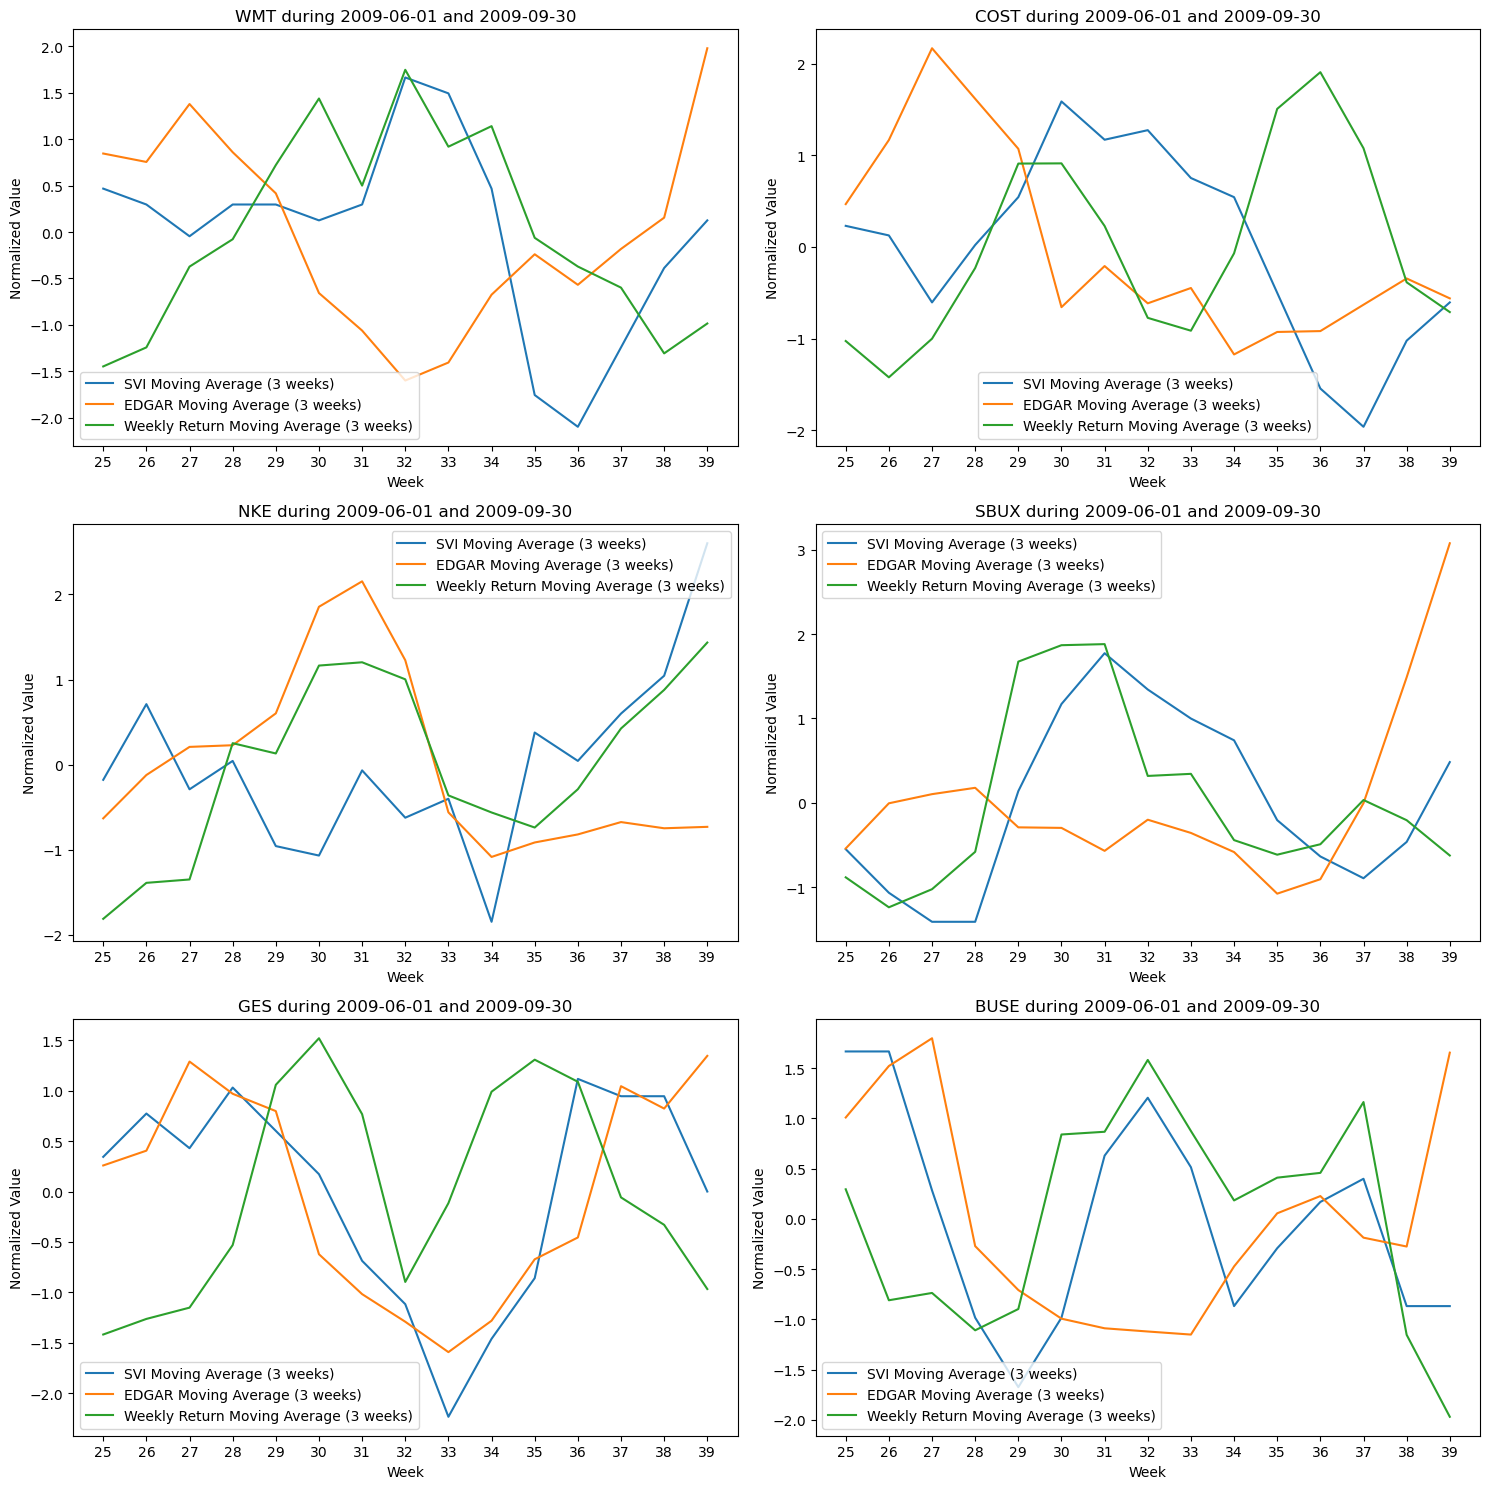

In [17]:
goods_com = ['WMT', 'COST', 'NKE', 'SBUX', 'GES', 'BUSE']
plot_comparison_grid(goods_com, '2009', '2009-06-01', '2009-09-30')

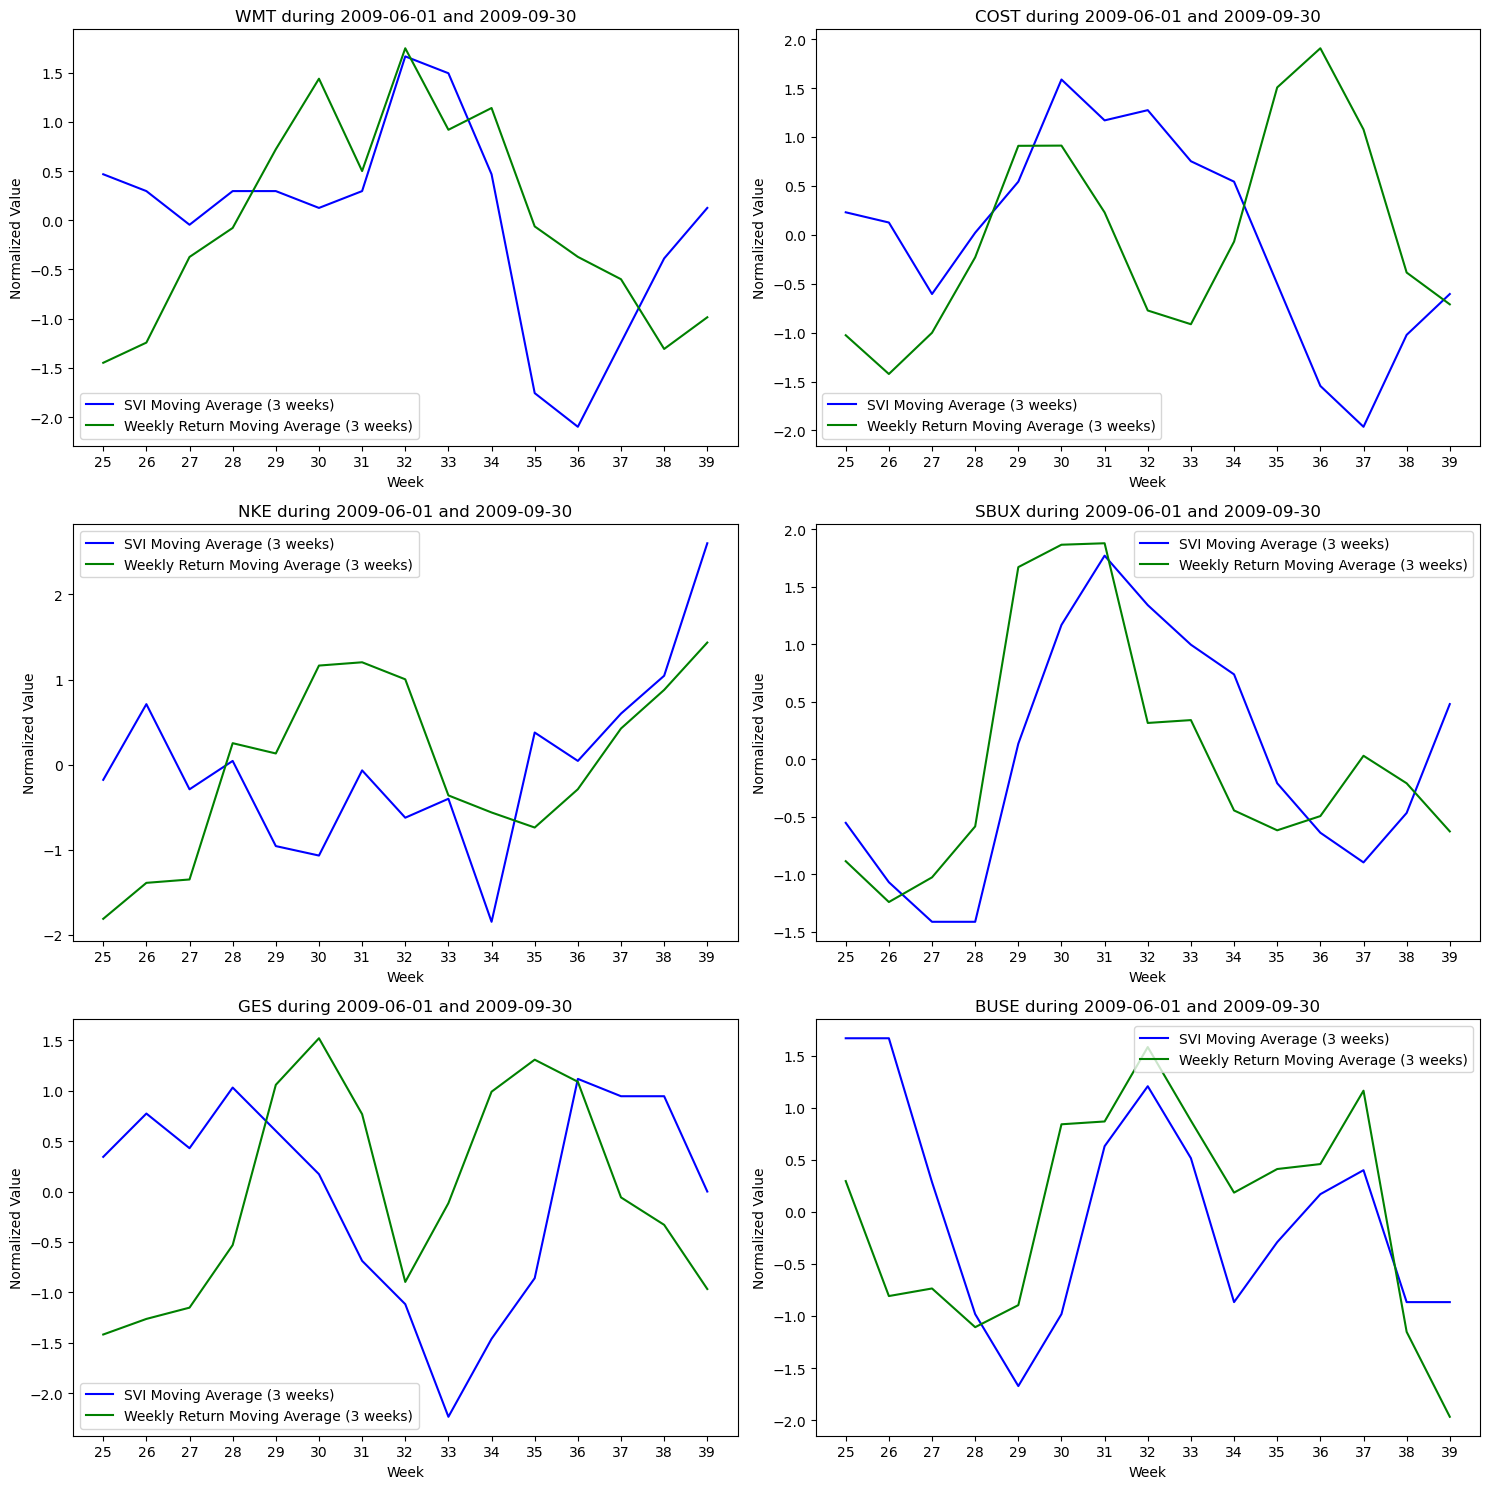

In [18]:
compare_svi_grid(goods_com, '2009', '2009-06-01', '2009-09-30')

For large companies like COST and WMT, there appears to be a positive correlation between SVI and weekly return. For instance, when SVI for WMT sharply declined from week 32 to week 36, its weekly return also plummeted from week 32 to week 38. Similarly, for NKE, when SVI surged from week 34 to week 39, its weekly return began to sharply rise from week 35 onwards.

However, for small companies, the impact of SVI on weekly return is not clearly observable, and in some cases, changes in weekly return seem to trigger changes in SVI instead.

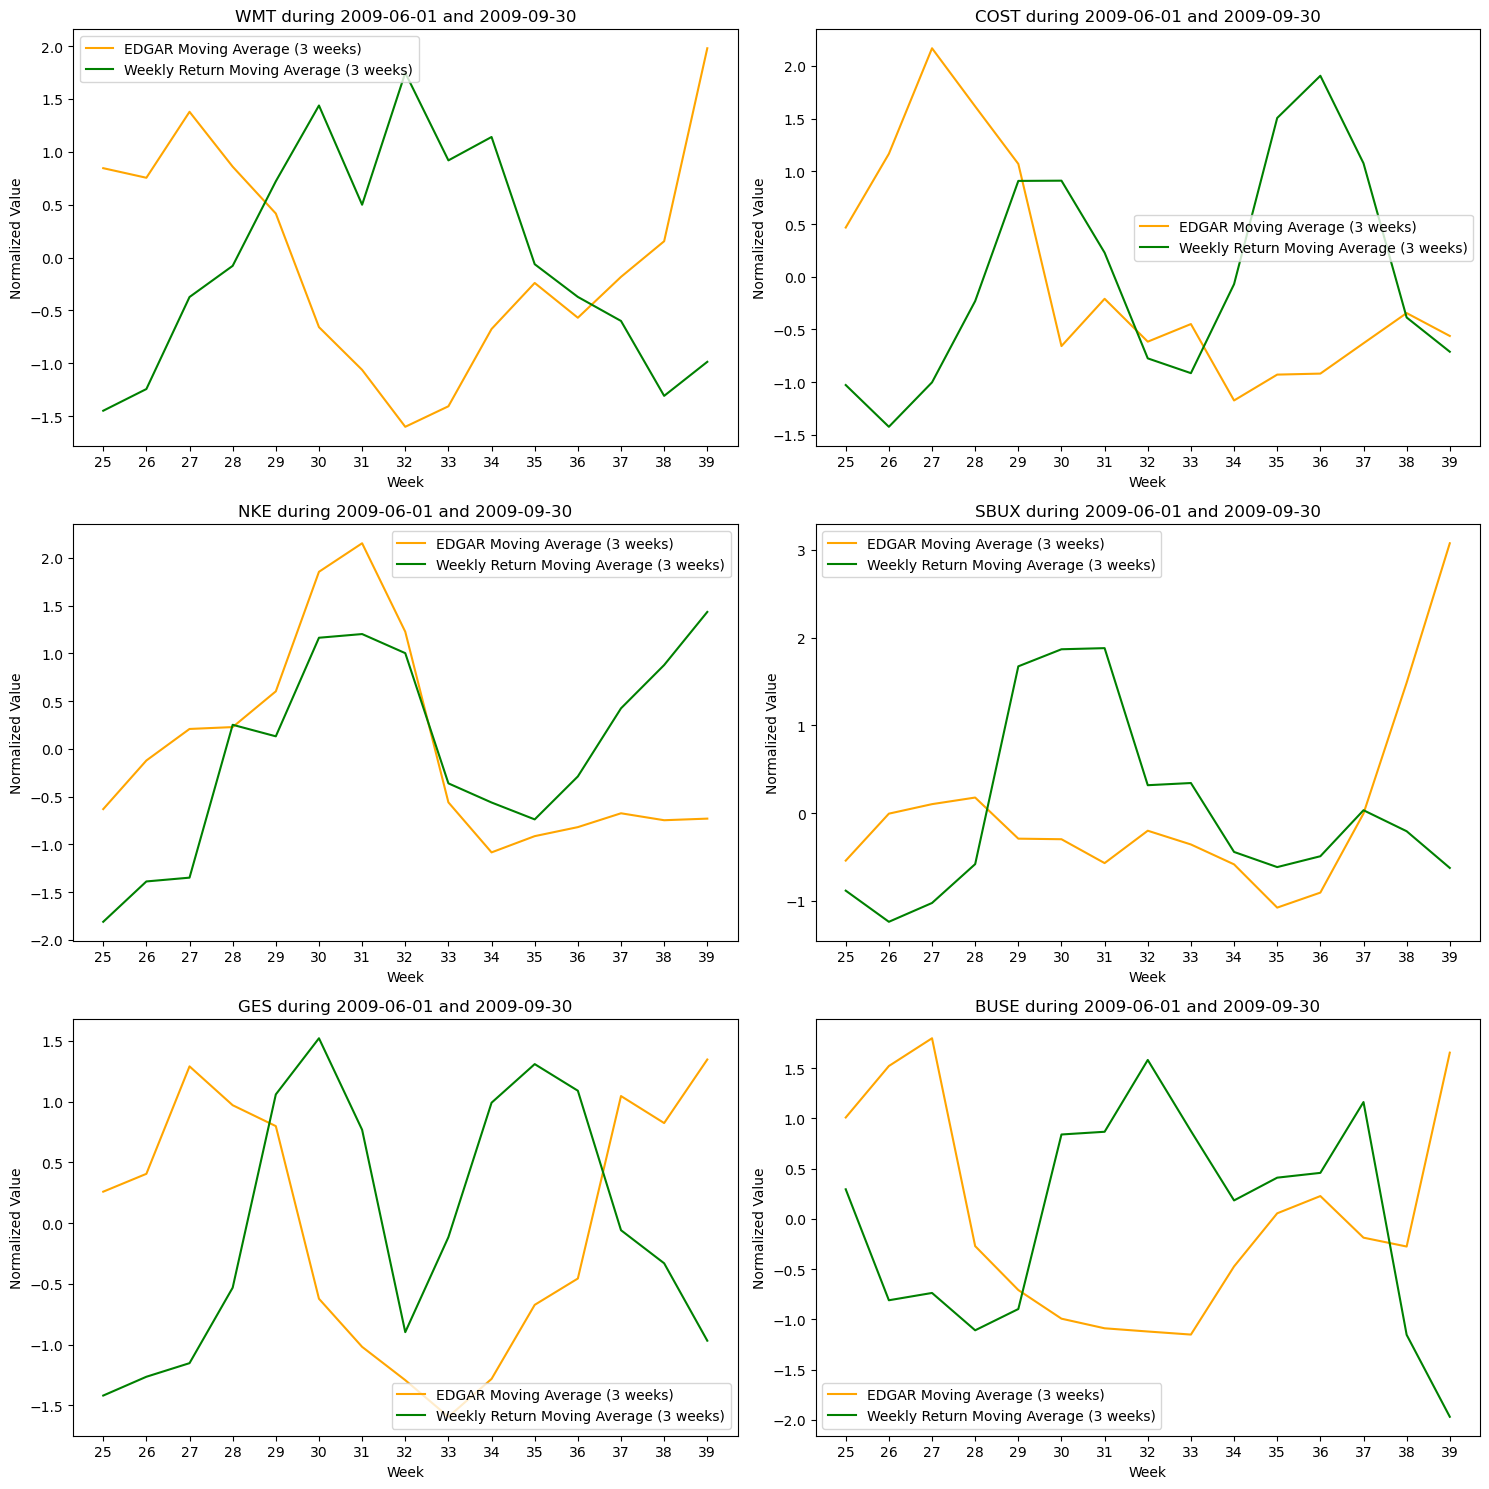

In [19]:
compare_edgar_grid(goods_com, '2009', '2009-06-01', '2009-09-30')

It's not evident that there is a strong correlation between EDGAR and weekly return.